In [49]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [50]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [51]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
data.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)


In [53]:
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data[['petal length (cm)']])
data['petal length (cm)'] = scaler.transform(data[['petal length (cm)']])
scaler.fit_transform(data[['petal width (cm)']])
data['petal width (cm)'] = scaler.transform(data[['petal width (cm)']])
data


,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


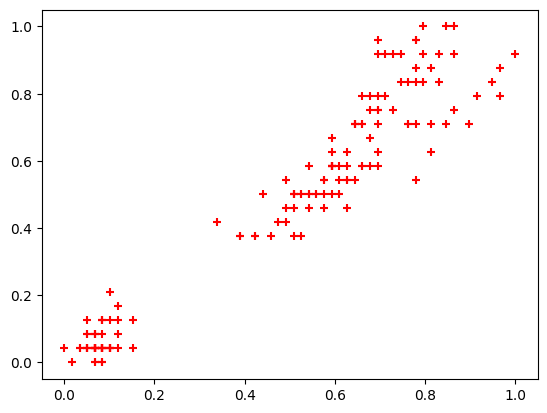

In [55]:
import matplotlib.pyplot as plt
plt.scatter(data['petal length (cm)'],data['petal width (cm)'],color='red',marker='+')

In [56]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(data[['petal length (cm)','petal width (cm)']])

In [57]:
data['cluster'] = y_predicted
data

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [58]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]


Text(0, 0.5, 'petal width (cm)')

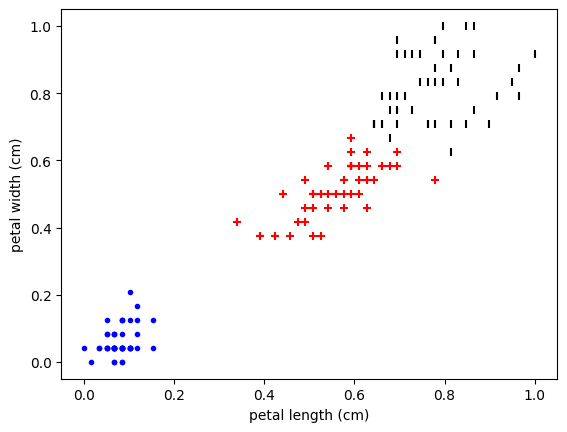

In [59]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='+',color = 'red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],marker='.',color = 'blue')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],marker='|',color = 'black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')



In [60]:
k_no = 12
sse = []
for k in range(1,k_no):
    km = KMeans(n_clusters=12)
    km.fit_predict(data[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [61]:
sse

[0.3183294532027911,
 0.325517456399443,
 0.3123739432482847,
 0.31603164584083665,
 0.3213772785373961,
 0.29606201930250475,
 0.29716015924237993,
 0.32409300842673244,
 0.30172569785249537,
 0.3277787869358235,
 0.3077071809322144]

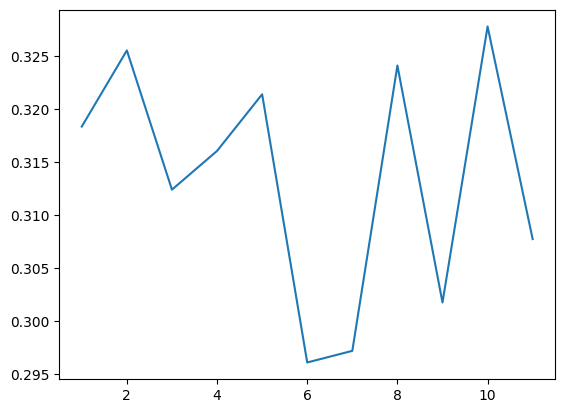

In [62]:
plt.plot(range(1,k_no),sse)